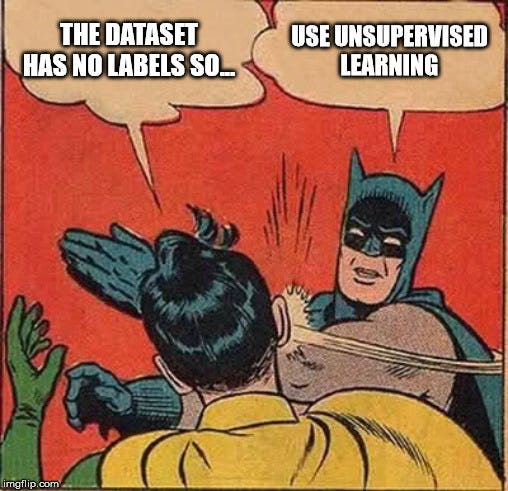

<div class = "alert alert-info">
<h1><strong>Unsupervised Learning Techniques</strong></h1>


Although most of the applications of Machine Learning today are based on super‐
vised learning (and as a result, this is where most of the investments go to), the vast
majority of the available data is unlabeled: we have the input features X, but we do
not have the labels y. The computer scientist Yann LeCun famously said that “if intel‐
ligence was a cake, unsupervised learning would be the cake, supervised learning
would be the icing on the cake, and reinforcement learning would be the cherry on
the cake.” In other words, there is a huge potential in unsupervised learning that we
have only barely started to sink our teeth into.

</div>


<div class = "alert alert-warning">
<h2>Clustering</h2>

The goal is to group similar instances together into clusters. Clustering is a great
tool for data analysis, customer segmentation, recommender systems, search
engines, image segmentation, semi-supervised learning, dimensionality reduc‐
tion, and more.
<h2>Anomaly detection</h2>
The objective is to learn what “normal” data looks like, and then use that to
detect abnormal instances, such as defective items on a production line or a new
trend in a time series.
<h2>Density estimation</h2>
This is the task of estimating the probability density function (PDF) of the random
process that generated the dataset. Density estimation is commonly used for
anomaly detection: instances located in very low-density regions are likely to be
anomalies. It is also useful for data analysis and visualization.

<ui><br></ui>
    
    
Ready for some cake? We will start with clustering, using K-Means and DBSCAN,
and then we will discuss Gaussian mixture models and see how they can be used for
density estimation, clustering, and anomaly detection.

</div>


<div class = "alert alert-danger">
<h1>Clustering</h1>

<ui>
<li>It is the task of identifying similar instances and assigning
them to clusters, or groups of similar instances.</li>
<br>
<p>Just like in classification, each instance gets assigned to a group. However, unlike clas‐
sification, clustering is an unsupervised task. Consider: on the left is the
iris dataset, where each instance’s species (i.e., its class) is
represented with a different marker. It is a labeled dataset, for which classification
algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well
suited. On the right is the same dataset, but without the labels, so you cannot use a
classification algorithm anymore. This is where clustering algorithms step in: many of
them can easily detect the lower-left cluster. It is also quite easy to see with our own
eyes, but it is not so obvious that the upper-right cluster is composed of two distinct
sub-clusters. That said, the dataset has two additional features (sepal length and
width), not represented here, and clustering algorithms can make good use of all fea‐
tures, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mix‐
    ture model, only 5 instances out of 150 are assigned to the wrong cluster).</p>
</ui>
</div>

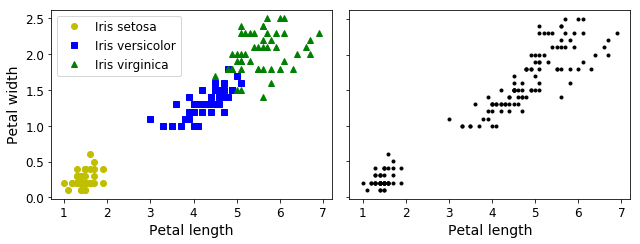


<div class = "alert alert-success">
<h3>Clustering is a versatile technique used in various applications:</h3>
<ui>
    
1. Customer Segmentation: Cluster customers based on purchases and website activity to understand their needs and personalize products and marketing.

2. Data Analysis: Analyze new datasets by running clustering algorithms to study each cluster separately.

3. Dimensionality Reduction: After clustering, measure each instance's affinity with clusters, reducing the dataset's dimensionality for further processing.

4. Anomaly Detection: Instances with low affinity to all clusters are likely anomalies, useful in detecting defects or fraud.

5. Semi-supervised Learning: Use clustering to propagate labels and improve the performance of supervised learning algorithms with limited labels.

6. Search Engines: Build systems to find similar images using clustering on a database of images.

7. Image Segmentation: Cluster pixels based on color to reduce the number of colors in an image, aiding object detection and tracking systems.

    
<br>
<li>It's important to note that the definition of a cluster varies based on the context, and different algorithms capture different types of clusters, such as centroid-based or densely packed regions. The choice of clustering algorithm depends on the specific problem and data characteristics.</li>
<br>


<li>we will look at two popular clustering algorithms, K-Means and
DBSCAN, and explore some of their applications, such as nonlinear dimensionality
    reduction, semi-supervised learning, and anomaly detection.</li>
    
</ui>
</div>

<div class = "alert alert-info">
<h1>K-Means</h1>

<ui>

    
<li>Consider the unlabeled dataset represented below: you can clearly see five
blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering
this kind of dataset very quickly and efficiently, often in just a few iterations. It was
proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modula‐
    tion, but it was only published outside of the company in 1982.</li>

<li>In 1965, Edward W.
Forgy had published virtually the same algorithm, so K-Means is sometimes referred
    to as Lloyd–Forgy.</li>
    
</ui>
</div>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

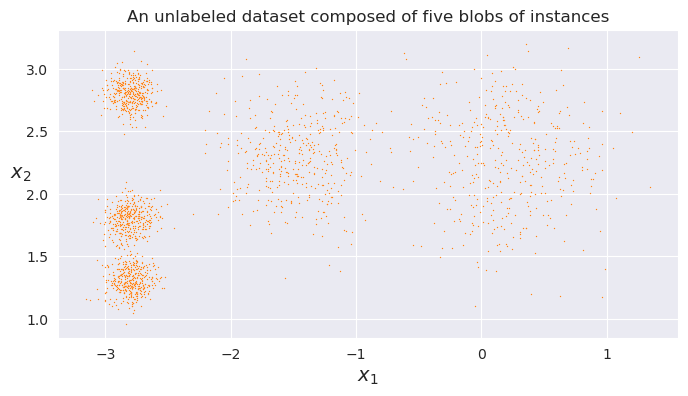

In [95]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    sns.scatterplot(x= X[:, 0],y =  X[:, 1], c=y, s=1,palette="pastel")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plt.title("An unlabeled dataset composed of five blobs of instances")
plot_clusters(X)
plt.show()

<div class = "alert alert-success">
Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and
assign each instance to the closest blob:
</div>

In [96]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

<div class = "alert alert-warning">
Each instance was assigned to one of the 5 clusters:
</div>

In [97]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [98]:
y_pred is kmeans.labels_

True

<div class = "alert alert-danger">
And the following 5 _centroids_ (i.e., cluster centers) were estimated:
</div>

In [99]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

<div class = "alert alert-info">
Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:
</div>

In [100]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

<div class = "alert alert-warning">
Of course, we can predict the labels of new instances:
</div>

In [101]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

<div class = "alert alert-danger">
If you plot the cluster’s decision boundaries, you get a Voronoi tessellation (see, where each centroid is represented with an X).

</div>

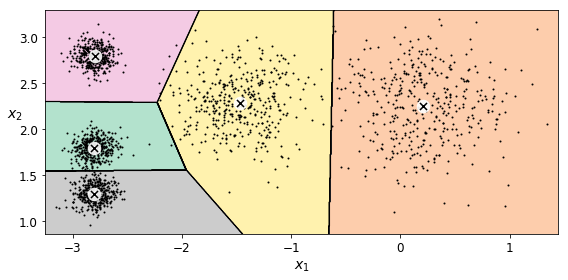

<div class = "alert alert-success">
<ui>

<li>Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.</li>

<br>

<h3>Hard Clustering vs Soft Clustering</h3>
Instead of assigning each instance to a single cluster, which is called hard clustering,it
can be useful to give each instance a score per cluster, which is called soft clustering.
The score can be the distance between the instance and the centroid; conversely, it
can be a similarity score (or affinity), such as the Gaussian Radial Basis Function
(introduced in Chapter 5). In the KMeans class, the transform() method measures
the distance from each instance to every centroid:
</ui>
</div>

In [102]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

<div class = "alert alert-info">
<h3>The K-Means Algorithm</h3>

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.
    
The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

</div>

In [103]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

### And let's plot this:

 #### The K-Means algorithm
 
 
 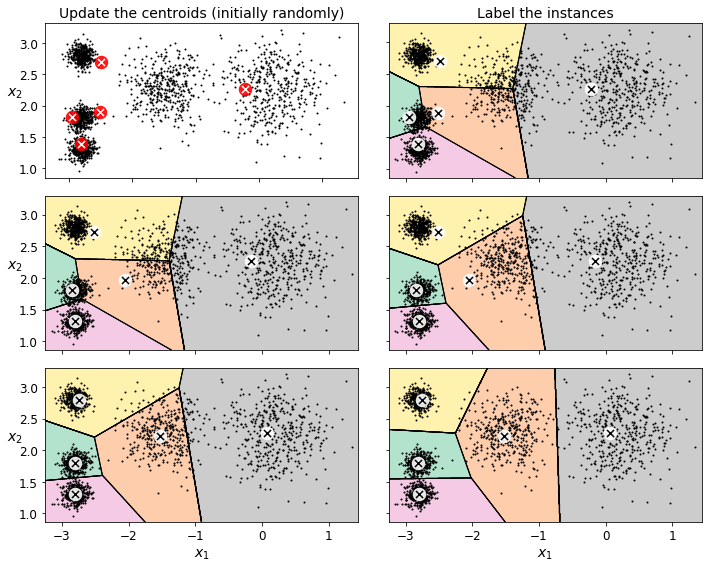

<div class = "alert alert-danger">
<h3>K-Means Variability</h3>

<ui>
<li>In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.</li>

<li>However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:</li>
</ui>

</div>

In [104]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)




#### Suboptimal solutions due to unlucky centroid initializations
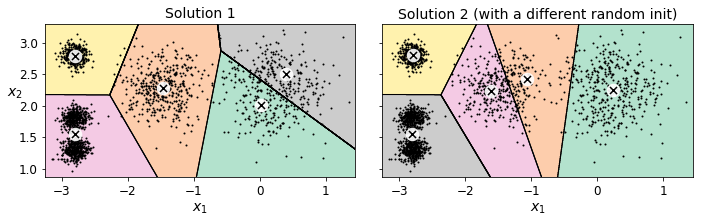

<div class = "alert alert-warning">

<h2>Inertia</h2>

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

</div>

In [105]:
kmeans.inertia_

211.5985372581684

<div class = "alert alert-success">

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:
    
</div>

In [106]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816862

<div class = "alert alert-info">


The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.
    
</div>

In [107]:
kmeans.score(X)

-211.59853725816836

<div class = "alert alert-warning">


<h3>Centroid initialization methods</h3>

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.


To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):




In [108]:
KMeans()

KMeans()

In [109]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

<div class = "alert alert-danger">

<h2>Accelerated K-Means</h2>
<ui>
    
<li>The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids.</li>

<li>To use Elkan's variant of K-Means, just set `algorithm="elkan"`. Note that it does not support sparse data, so by default, Scikit-Learn uses `"elkan"` for dense data, and `"full"` (the regular K-Means algorithm) for sparse data.</li>
    
</ui>
</div>
    

In [110]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

92.8 ms ± 8.14 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [111]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

60.1 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


<div class = "alert alert-success">

There's no big difference in this case, as the dataset is fairly small.
</div>

<div class = "alert alert-info">

<h2>Mini-Batch K-Means</h2>

Instead of using the full dataset at each iteration, the algo‐
rithm is capable of using mini-batches, moving the centroids just slightly at each iter‐
ation. This speeds up the algorithm typically by a factor of three or four and makes it
possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
this algorithm in the MiniBatchKMeans class. You can just use this class like the
KMeans class:
</div>

In [112]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

minibatch_kmeans.inertia_



211.65239850433193

<div class = "alert alert-danger">

Although the Mini-batch K-Means algorithm is much faster than the regular KMeans algorithm, its inertia is generally slightly worse, especially as the number of
clusters increases. You can see this: the plot on the left compares the
inertias of Mini-batch K-Means and regular K-Means models trained on the previous
dataset using various numbers of clusters k. The difference between the two curves
remains fairly constant, but this difference becomes more and more significant as k
increases, since the inertia becomes smaller and smaller. In the plot on the right, you
can see that Mini-batch K-Means is much faster than regular K-Means, and this dif‐
ference increases with k.
</div>



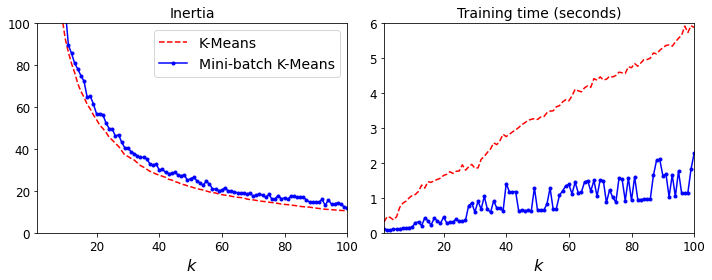

<div class = "alert alert-warning">

So far, we have set the number of clusters k to 5 because it was obvious by looking at
the data that this was the correct number of clusters. But in general, it will not be so
easy to know how to set k, and the result might be quite bad if you set it to the wrong
value. As you can see, setting k to 3 or 8 results in fairly bad models.

</div>



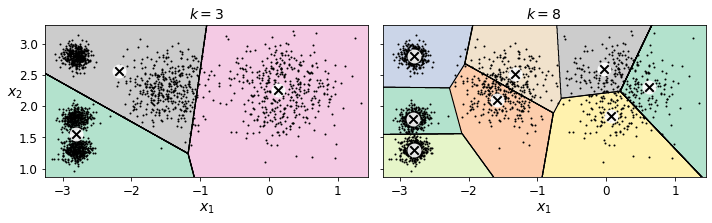

<div class = "alert alert-warning">

    
<h2>Elbow Method</h2>
You might be thinking that we could just pick the model with the lowest inertia,
right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much
higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. The
inertia is not a good performance metric when trying to choose k because it keeps
getting lower as we increase k. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s
plot the inertia as a function of k 
    
</div>

In [113]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

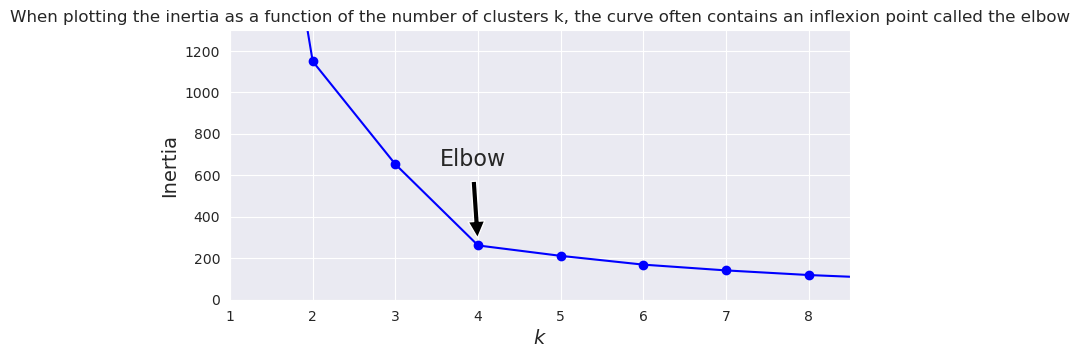

In [114]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.title("When plotting the inertia as a function of the number of clusters k, the curve often contains an inflexion point called the elbow")
plt.show()

<div class = "alert alert-success">


As you can see, there is an elbow at  𝑘=4
 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So  𝑘=4
  is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.
</div>


<div class = "alert alert-warning">


<h2>Silhouette Method</h2>
    
    
This technique for choosing the best value for the number of clusters is rather coarse.
A more precise approach (but also more computationally expensive) is to use the
silhouette score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean
distance to the other instances in the same cluster (i.e., the mean intra-cluster dis‐
tance) and b is the mean nearest-cluster distance (i.e., the mean distance to the
instances of the next closest cluster, defined as the one that minimizes b, excluding
the instance’s own cluster). 
    
    
The silhouette coefficient can vary between –1 and +1. A
coefficient close to +1 means that the instance is well inside its own cluster and far
from other clusters, while a coefficient close to 0 means that it is close to a cluster
boundary, and finally a coefficient close to –1 means that the instance may have been
assigned to the wrong cluster.
To compute the silhouette score, you can use Scikit-Learn’s silhouette_score()
function, giving it all the instances in the dataset and the labels they were assigned:

</div>

In [115]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [116]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

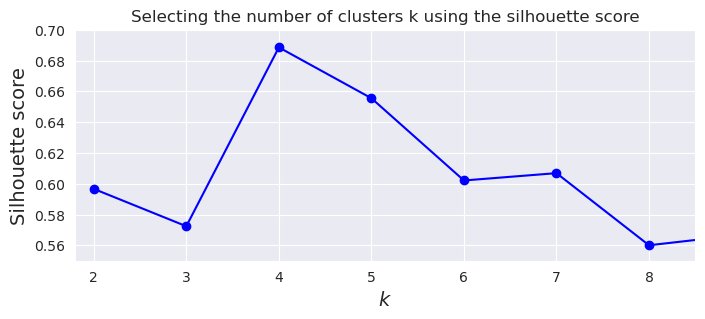

In [117]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.title("Selecting the number of clusters k using the silhouette score")
plt.show()

<div class = "alert alert-danger">

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that  𝑘=4
  is a very good choice, but it also underlines the fact that  𝑘=5
  is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

    
</div>
    
    
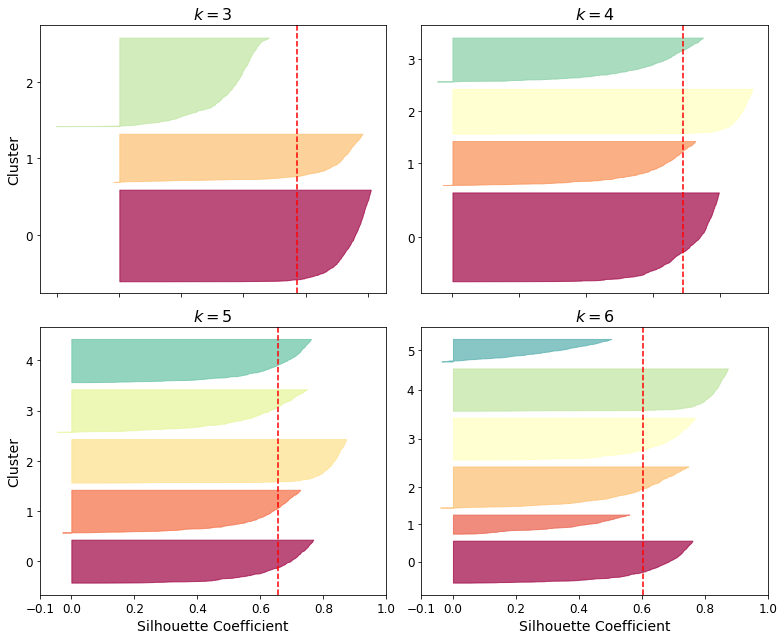


<div class = "alert alert-warning">

As you can see,  𝑘=5
  looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.
</div>

<div class = "alert alert-info">


<h3>Limits of K-Means</h3>

Despite its many merits, most notably being fast and scalable, K-Means is not perfect.
As we saw, it is necessary to run the algorithm several times to avoid suboptimal solu‐
tions, plus you need to specify the number of clusters, which can be quite a hassle.
Moreover, K-Means does not behave very well when the clusters have varying sizes,different densities, or nonspherical shapes. below shows how KMeans clusters a dataset containing three ellipsoidal clusters of different dimensions,
densities, and orientations.
    
</div>



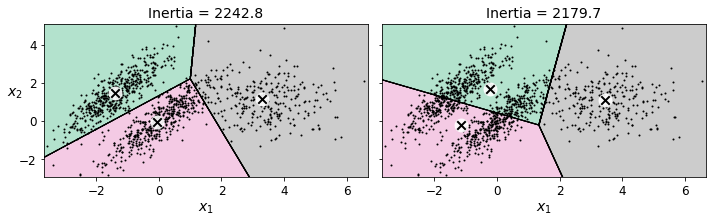

<div class = "alert alert-success">

As you can see, neither of these solutions is any good. The solution on the left is bet‐
ter, but it still chops off 25% of the middle cluster and assigns it to the cluster on the
right. The solution on the right is just terrible, even though its inertia is lower. So,
depending on the data, different clustering algorithms may perform better. On these
types of elliptical clusters, Gaussian mixture models work great.


It is important to scale the input features before you run K-Means,
or the clusters may be very stretched and K-Means will perform
poorly. Scaling the features does not guarantee that all the clusters
will be nice and spherical, but it generally improves things.

</div>

<div class = "alert alert-info">

<h1>DBSCAN</h1>
This algorithm defines clusters as continuous regions of high density. Here is how it
works:

• For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s εneighborhood.

• If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.

• All instances in the neighborhood of a core instance belong to the same cluster.
This neighborhood may include other core instances; therefore, a long sequence
of neighboring core instances forms a single cluster.

• Any instance that is not a core instance and does not have one in its neighbor‐
hood is considered an anomaly.


This algorithm works well if all the clusters are dense enough and if they are well sep‐
arated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as
you might expect. Let’s test it on the moons dataset
    
</div>

In [118]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)


In [119]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [120]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [121]:
len(dbscan.core_sample_indices_)

808

In [122]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [123]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [124]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [125]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

DBSCAN clustering using two different neighborhood radiuses

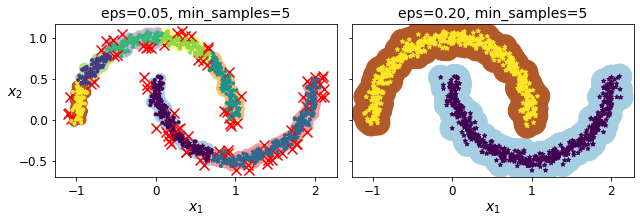


<div class = "alert alert-warning">

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which cluster a new
instance belongs to. This implementation decision was made because different classi‐
fication algorithms can be better for different tasks, so the authors decided to let the
user choose which one to use. Moreover, it’s not hard to implement. For example, let’s
train a KNeighborsClassifier:

</div>


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(n_neighbors=50)

In [127]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [128]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

Decision boundary between two clusters

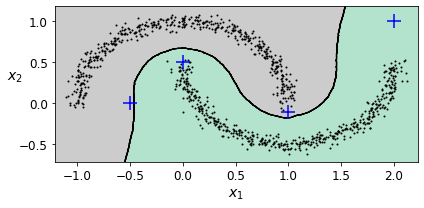

In [129]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

<div class = "alert alert-danger">

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any
number of clusters of any shape. It is robust to outliers, and it has just two hyperpara‐
meters (eps and min_samples). If the density varies significantly across the clusters,
however, it can be impossible for it to capture all the clusters properly. Its computa‐
tional complexity is roughly O(m log m), making it pretty close to linear with regard
to the number of instances, but Scikit-Learn’s implementation can require up to
O(m2
) memory if eps is large.

    
</div>

<div class = "alert alert-success">


<h1>Other Clustering Algorithms</h1>


Scikit-Learn offers several other clustering algorithms that are worth exploring. Here's a brief overview of some of them:

<div class = "alert alert-warning">

<h3>Agglomerative Clustering</h3>
    
This algorithm builds a hierarchy of clusters from individual instances by iteratively merging the nearest pairs of clusters. It scales well to large datasets and can capture clusters of various shapes. It produces a flexible cluster tree, allowing you to choose the desired cluster scale.

</div>
    
<div class = "alert alert-info">

<h3>BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)</h3>
    
BIRCH is designed for very large datasets and can be faster than batch K-Means. It builds a memory-efficient tree structure during training to quickly assign new instances to clusters.
    
</div>
    
<div class = "alert alert-danger">


<h3>Mean-Shift</h3>
    
Mean-Shift starts by placing circles on each instance and shifts them toward the mean of instances within the circle until convergence. It can find clusters of any shape and has few hyperparameters, but it is not suitable for large datasets due to its computational complexity.
    
</div>
    
<div class = "alert alert-info">


<h3>Affinity Propagation</h3>
    
This algorithm uses a voting system where instances vote for similar representatives, forming clusters. Affinity propagation can detect clusters of different sizes but has a high computational complexity, making it impractical for large datasets.
    
</div>
    
<div class = "alert alert-warning">


<h3>Spectral Clustering</h3>
    
Spectral clustering reduces the dimensionality of a similarity matrix between instances and then applies another clustering algorithm (typically K-Means). It can capture complex cluster structures but does not scale well to large datasets and may have issues with clusters of very different sizes.

</div>
    
    
Each algorithm has its strengths and limitations, and the choice depends on the specific dataset and requirements of the clustering task.
    
</div>

In [130]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)


SpectralClustering(gamma=1, n_clusters=2, random_state=42)

#### **Spectral Clustering**
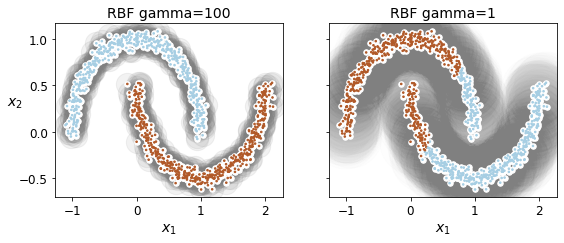

In [131]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]



In [132]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [133]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

<div class = "alert alert-warning">

Now let’s dive into Gaussian mixture models, which can be used for density estima‐
tion, clustering, and anomaly detection.
</div>

<div class = "alert alert-info">

<h1>Gaussian Mixtures</h1>

<ui>

<li>A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown. All the instances generated from a single Gaussian distri‐
bution form a cluster that typically looks like an ellipsoid. Each cluster can have a dif‐
    ferent ellipsoidal shape, size, density, and orientation</li>


<li>There are several GMM variants. In the simplest variant, implemented in the Gaus
sianMixture class, you must know in advance the number k of Gaussian distribu‐
tions. The dataset X is assumed to have been generated through the following
    probabilistic process:</li>



<li>For each instance, a cluster is picked randomly from among k clusters. The prob‐
ability of choosing the j
th cluster is defined by the cluster’s weight, ϕ
(j)
.
7
 The index
of the cluster chosen for the i
th instance is noted z
(i)
    .</li>



<li>If z
(i)=j, meaning the i
th instance has been assigned to the j
th cluster, the location
x
(i)
 of this instance is sampled randomly from the Gaussian distribution with
mean μ
(j)
 and covariance matrix Σ
(j)
. This is noted x
i ׂ ᇬ μ
j
, Σ
    j</li>
    
<br>
    
    
This generative process can be represented as a graphical model. Figure 9-16 repre‐
sents the structure of the conditional dependencies between random variables.

</ui>
</div>

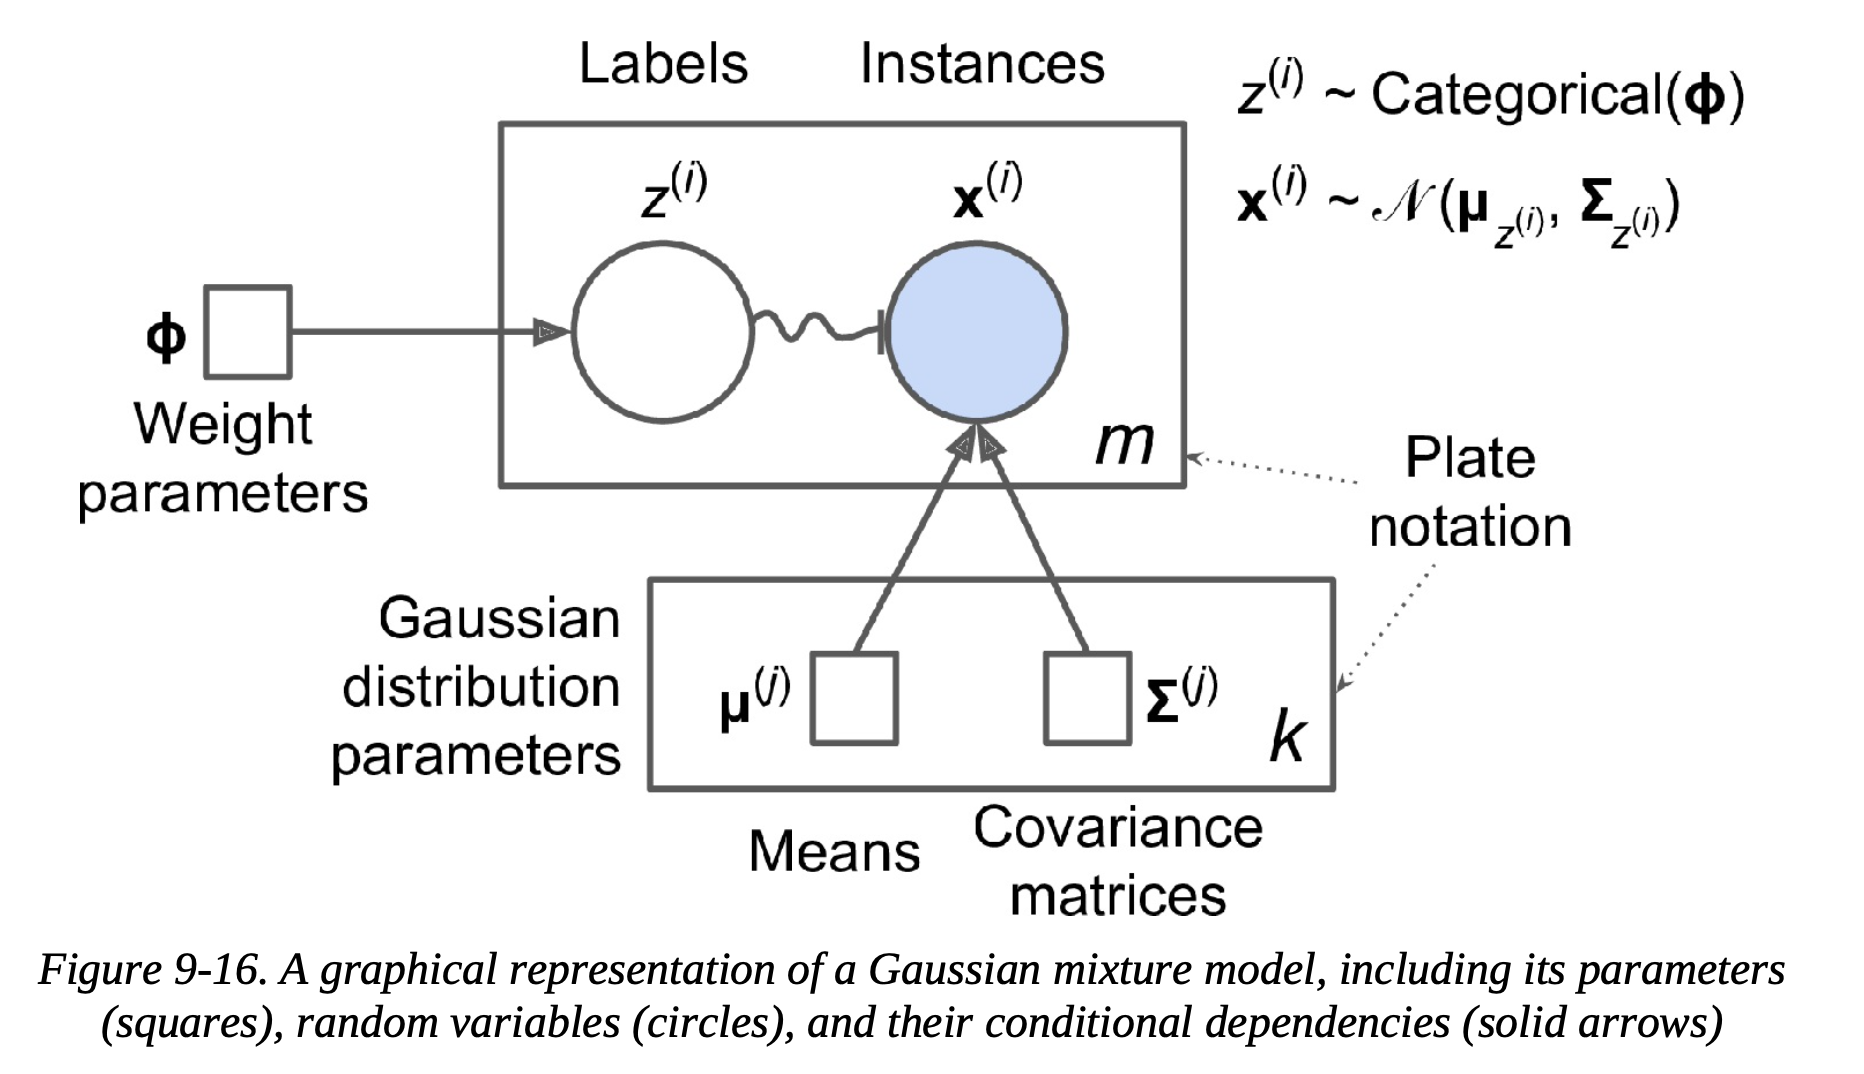


<div class = "alert alert-warning">

Here is how to interpret the figure:

• The circles represent random variables.

• The squares represent fixed values (i.e., parameters of the model).

• The large rectangles are called plates. They indicate that their content is repeated
several times.

• The number at the bottom right of each plate indicates how many times its con‐
tent is repeated. So, there are m random variables z
(i)
(from z
(1) to z
(m)
) and m
random variables x
(i)
. There are also k means μ
(j)
 and k covariance matrices Σ
(j)
.
Lastly, there is just one weight vector ϕ (containing all the weights ϕ
(1) to ϕ
(k)
).


• Each variable z
(i)
 is drawn from the categorical distribution with weights ϕ. Each
variable x
(i)
is drawn from the normal distribution, with the mean and covariance
matrix defined by its cluster z
(i)
.


• The solid arrows represent conditional dependencies. For example, the probabil‐
ity distribution for each random variable z
(i)
 depends on the weight vector ϕ.
Note that when an arrow crosses a plate boundary, it means that it applies to all
the repetitions of that plate. For example, the weight vector ϕ conditions the
probability distributions of all the random variables x
(1) to x
(m)
.



• The squiggly arrow from z
(i)
 to x
(i)
represents a switch: depending on the value of
z
(i)
, the instance x
(i)
 will be sampled from a different Gaussian distribution. For
example, if z
(i)=j, then x
i ׂ ᇬ μ
j
, Σ
j
.


• Shaded nodes indicate that the value is known. So, in this case, only the random
variables x
(i) have known values: they are called observed variables. The unknown
random variables z
(i)
 are called latent variables.
 
 
 
 
 So, what can you do with such a model? Well, given the dataset X, you typically want
to start by estimating the weights ϕ and all the distribution parameters μ
(1) to μ
(k)
 and
Σ
(1) to Σ
(k)
. Scikit-Learn’s GaussianMixture class makes this super easy:


</div>

In [134]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [135]:
from sklearn.mixture import GaussianMixture

In [136]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [137]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [138]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [139]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [140]:
gm.converged_

True

In [141]:
gm.n_iter_

4

In [142]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [143]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [144]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [145]:
y_new

array([0, 0, 1, 2, 2, 2])

In [146]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [147]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215022

#### Cluster means, decision boundaries, and density contours of a trained Gaussian mixture model
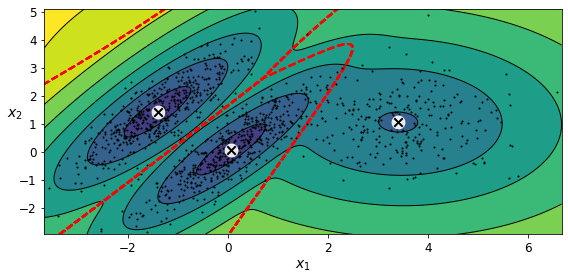

<div class = "alert alert-danger">


You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
    
</div>

In [148]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

#### Gaussian mixtures for tied clusters (left) and spherical clusters (right)

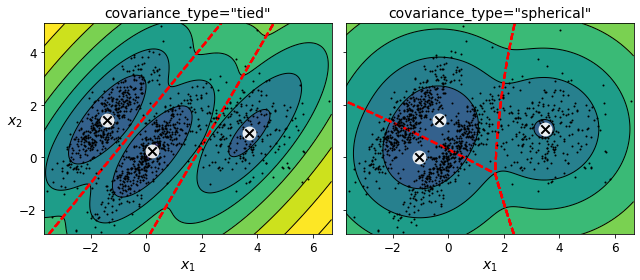


#### Gaussian mixtures for full clusters (left) and diag clusters (right)

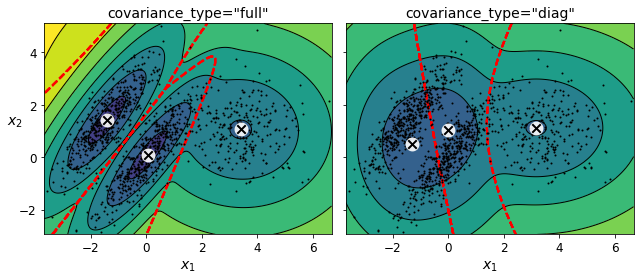

<div class = "alert alert-success">

<h3>Anomaly Detection Using Gaussian Mixtures</h3>


Anomaly detection (also called outlier detection) is the task of detecting instances that
deviate strongly from the norm. These instances are called anomalies, or outliers,
while the normal instances are called inliers. Anomaly detection is useful in a wide
variety of applications, such as fraud detection, detecting defective products in manu‐
facturing, or removing outliers from a dataset before training another model (which
can significantly improve the performance of the resulting model).


Using a Gaussian mixture model for anomaly detection is quite simple:
    
    
</div>

In [149]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

#### Anomaly detection using a Gaussian mixture model

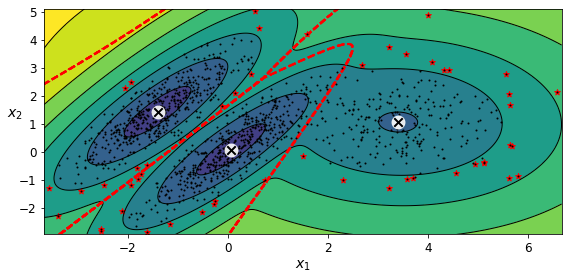

<div class = "alert alert-warning">

A closely related task is novelty detection: it differs from anomaly detection in that the
algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers,
whereas anomaly detection does not make this assumption. Indeed, outlier detection
is often used to clean up a dataset.
    
</div>

<div class = "alert alert-info">

<h2>Selecting the Number of Clusters</h2>


We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).
    
</div>

In [150]:
gm.bic(X)

8189.747000497186

In [151]:
gm.aic(X)

8102.521720382148

In [152]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [153]:
bic, aic


(8189.747000497186, 8102.521720382148)

In [154]:
n_params

17


<div class = "alert alert-danger">

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.


Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:
    
</div>

In [155]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [156]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

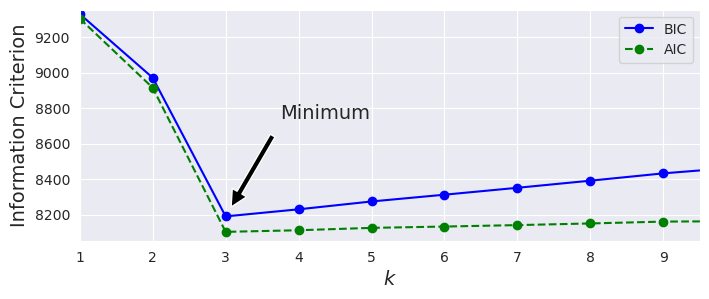

In [158]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

<div class = "alert alert-warning">

Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

</div>

In [159]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [160]:
best_k

3

In [161]:
best_covariance_type

'full'

<div class = "alert alert-success">

<h1>Bayesian Gaussian Mixture Models</h1>

Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

</div>    
    
    
    
    
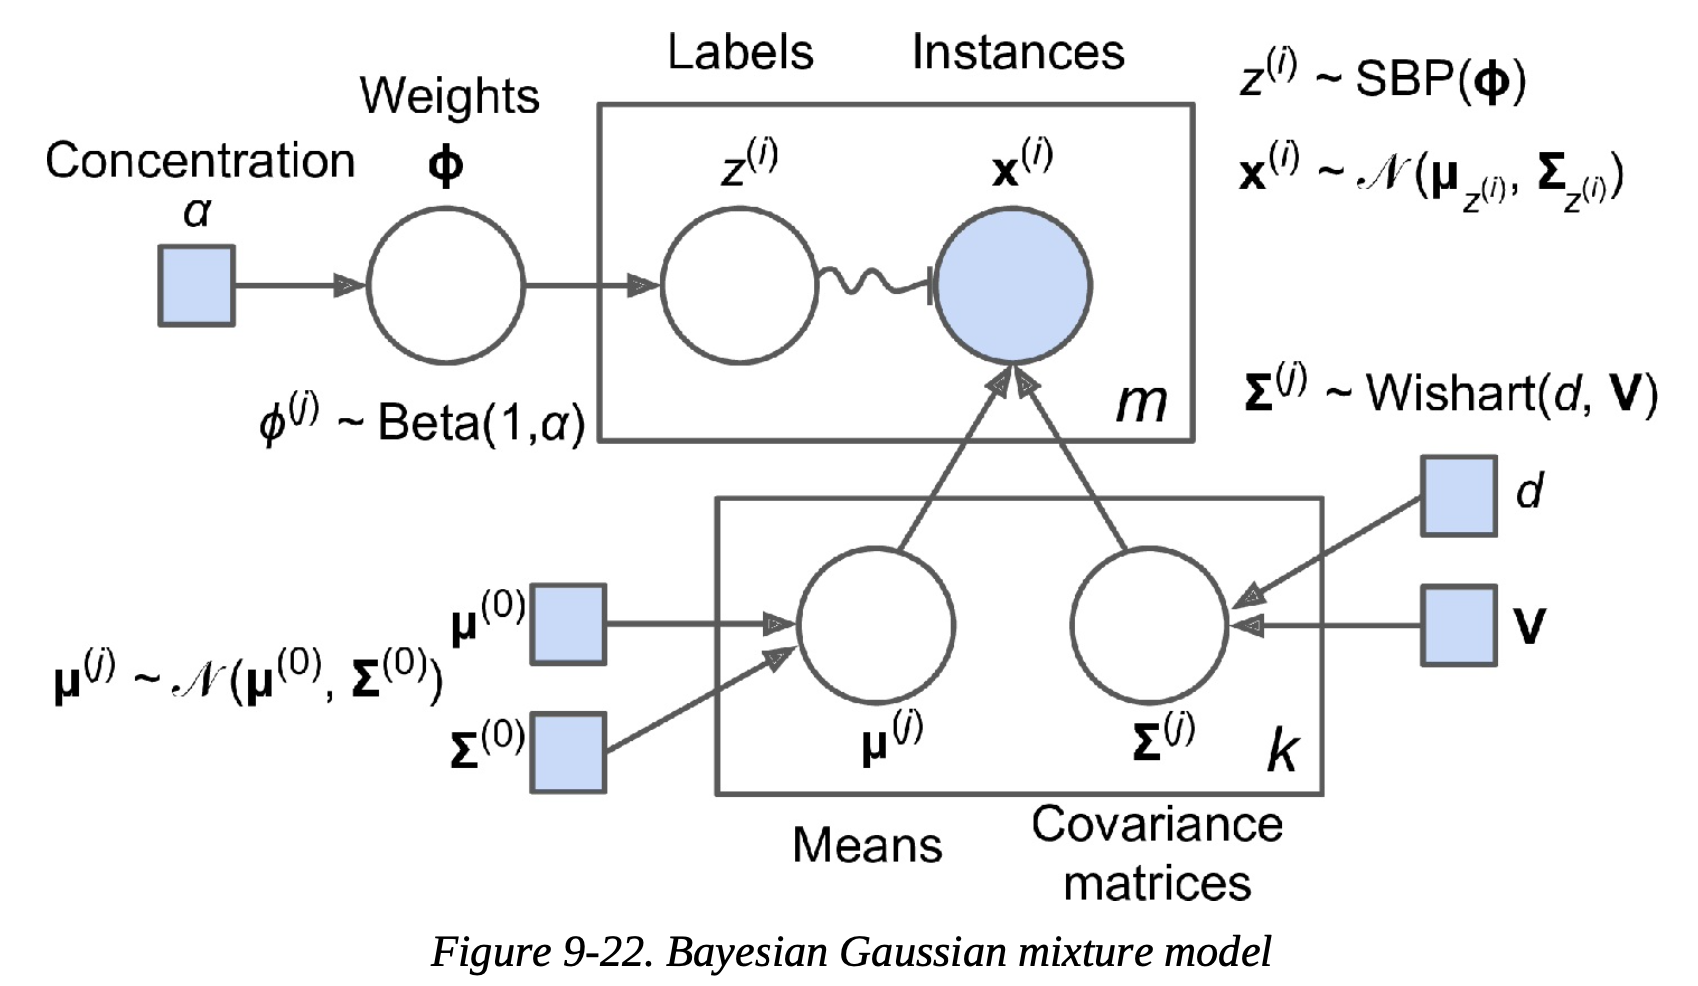

In [162]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [163]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Using different concentration priors on the same data results in different numbers of clusters


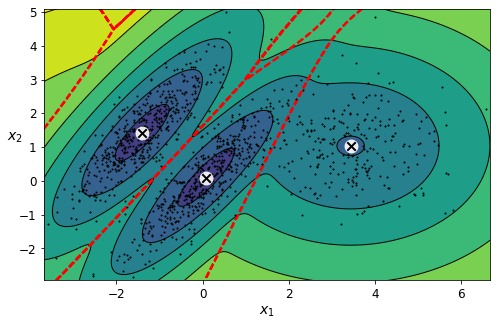

<div class = "alert alert-info">


Scikit-Learn provides several other algorithms specifically designed for anomaly and novelty detection:
<ui>
    
<br>
<div class = "alert alert-warning">
   
PCA (Principal Component Analysis) and other dimensionality reduction techniques
    
By comparing the reconstruction error of a normal instance with that of an anomaly, anomalies are identified by having significantly larger reconstruction errors. This approach is simple and efficient for anomaly detection.
</div>
<br>
<div class = "alert alert-danger">
   
Fast-MCD (Minimum Covariance Determinant)
    
Implemented in the EllipticEnvelope class, this algorithm is useful for outlier detection and dataset cleanup. It assumes that inliers are generated from a single Gaussian distribution and carefully estimates the parameters of the distribution, making it effective at identifying outliers.
</div>
<br>
<div class = "alert alert-success">
   
Isolation Forest
    
An efficient algorithm for outlier detection, especially in high-dimensional datasets. It constructs a Random Forest where each Decision Tree randomly splits the data until instances become isolated. Anomalies, being far from other instances, are isolated more quickly.
</div>
<br>
<div class = "alert alert-danger">

Local Outlier Factor (LOF)
    
This algorithm is also suitable for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. Anomalies are often more isolated compared to their k nearest neighbors.
</div>
<br>
<div class = "alert alert-warning">
   
One-class SVM
    
Primarily used for novelty detection. Instead of separating two classes, this algorithm tries to find a small region in high-dimensional space that encompasses all instances. If a new instance falls outside this region, it is considered a novelty. It works well with high-dimensional datasets but may not scale to large datasets like other SVMs.
</div>
    
    
    
    
These algorithms offer various approaches for identifying anomalies and novelties in datasets, and the choice depends on the specific characteristics of the data and the requirements of the task.

</ui>
</div>